Copyright (c) 2015, 2016 [Sebastian Raschka](sebastianraschka.com)

https://github.com/rasbt/python-machine-learning-book

[MIT License](https://github.com/rasbt/python-machine-learning-book/blob/master/LICENSE.txt)

# Python Machine Learning - Code Examples

# Chapter 6 - Learning Best Practices for Model Evaluation and Hyperparameter Tuning

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [ ]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p numpy,pandas,matplotlib,sklearn

*The use of `watermark` is optional. You can install this IPython extension via "`pip install watermark`". For more information, please see: https://github.com/rasbt/watermark.*

<br>
<br>

### Overview

- [Streamlining workflows with pipelines](#Streamlining-workflows-with-pipelines)
  - [Loading the Breast Cancer Wisconsin dataset](#Loading-the-Breast-Cancer-Wisconsin-dataset)
  - [Combining transformers and estimators in a pipeline](#Combining-transformers-and-estimators-in-a-pipeline)
- [Using k-fold cross-validation to assess model performance](#Using-k-fold-cross-validation-to-assess-model-performance)
  - [The holdout method](#The-holdout-method)
  - [K-fold cross-validation](#K-fold-cross-validation)
- [Debugging algorithms with learning and validation curves](#Debugging-algorithms-with-learning-and-validation-curves)
  - [Diagnosing bias and variance problems with learning curves](#Diagnosing-bias-and-variance-problems-with-learning-curves)
  - [Addressing overfitting and underfitting with validation curves](#Addressing-overfitting-and-underfitting-with-validation-curves)
- [Fine-tuning machine learning models via grid search](#Fine-tuning-machine-learning-models-via-grid-search)
  - [Tuning hyperparameters via grid search](#Tuning-hyperparameters-via-grid-search)
  - [Algorithm selection with nested cross-validation](#Algorithm-selection-with-nested-cross-validation)
- [Looking at different performance evaluation metrics](#Looking-at-different-performance-evaluation-metrics)
  - [Reading a confusion matrix](#Reading-a-confusion-matrix)
  - [Optimizing the precision and recall of a classification model](#Optimizing-the-precision-and-recall-of-a-classification-model)
  - [Plotting a receiver operating characteristic](#Plotting-a-receiver-operating-characteristic)
  - [The scoring metrics for multiclass classification](#The-scoring-metrics-for-multiclass-classification)
- [Summary](#Summary)

<br>
<br>

In [1]:
from IPython.display import Image
%matplotlib inline
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

# Streamlining workflows with pipelines

...

## Loading the Breast Cancer Wisconsin dataset

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


<hr>

### Note:


If the link to the Breast Cancer Wisconsin dataset dataset provided above does not work for you, you can find a local copy in this repository at [./../datasets/wdbc/wdbc.data](./../datasets/wdbc/wdbc.data).

Or you could fetch it via

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wdbc/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<hr>

In [5]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y0 = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y0)

In [6]:
print(le.transform(['M', 'B']))
print(y0[:3], y[:3])

[1 0]
['M' 'M' 'M'] [1 1 1]


In [7]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=1)

<br>
<br>

## Combining transformers and estimators in a pipeline

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])

# 学習
pipe_lr.fit(X_train, y_train)
# 学習データのaccuray
print('Train Accuracy: %.3f' % pipe_lr.score(X_train, y_train))

Train Accuracy: 0.954


In [9]:
# 学習済みのモデルにテストデータを入力して、値を予測
y_pred = pipe_lr.predict(X_test)
# 正解データと比較して、accuracyを計算
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.947


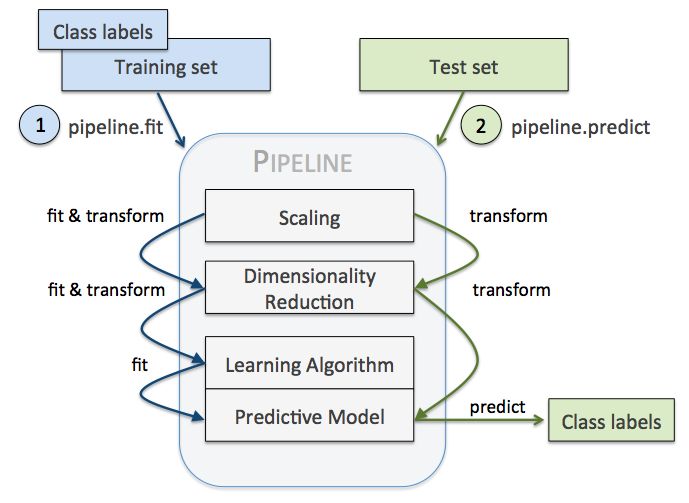

In [22]:
Image(filename='./images/06_01.png', width=500) 

<br>
<br>

# Using k-fold cross validation to assess model performance

...

## The holdout method

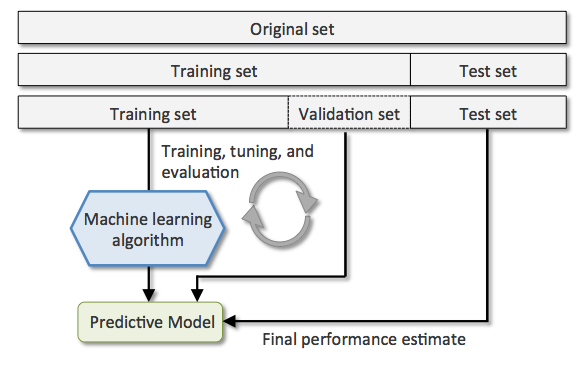

In [27]:
Image(filename='./images/06_02.png', width=500) 

<br>
<br>

## K-fold cross-validation

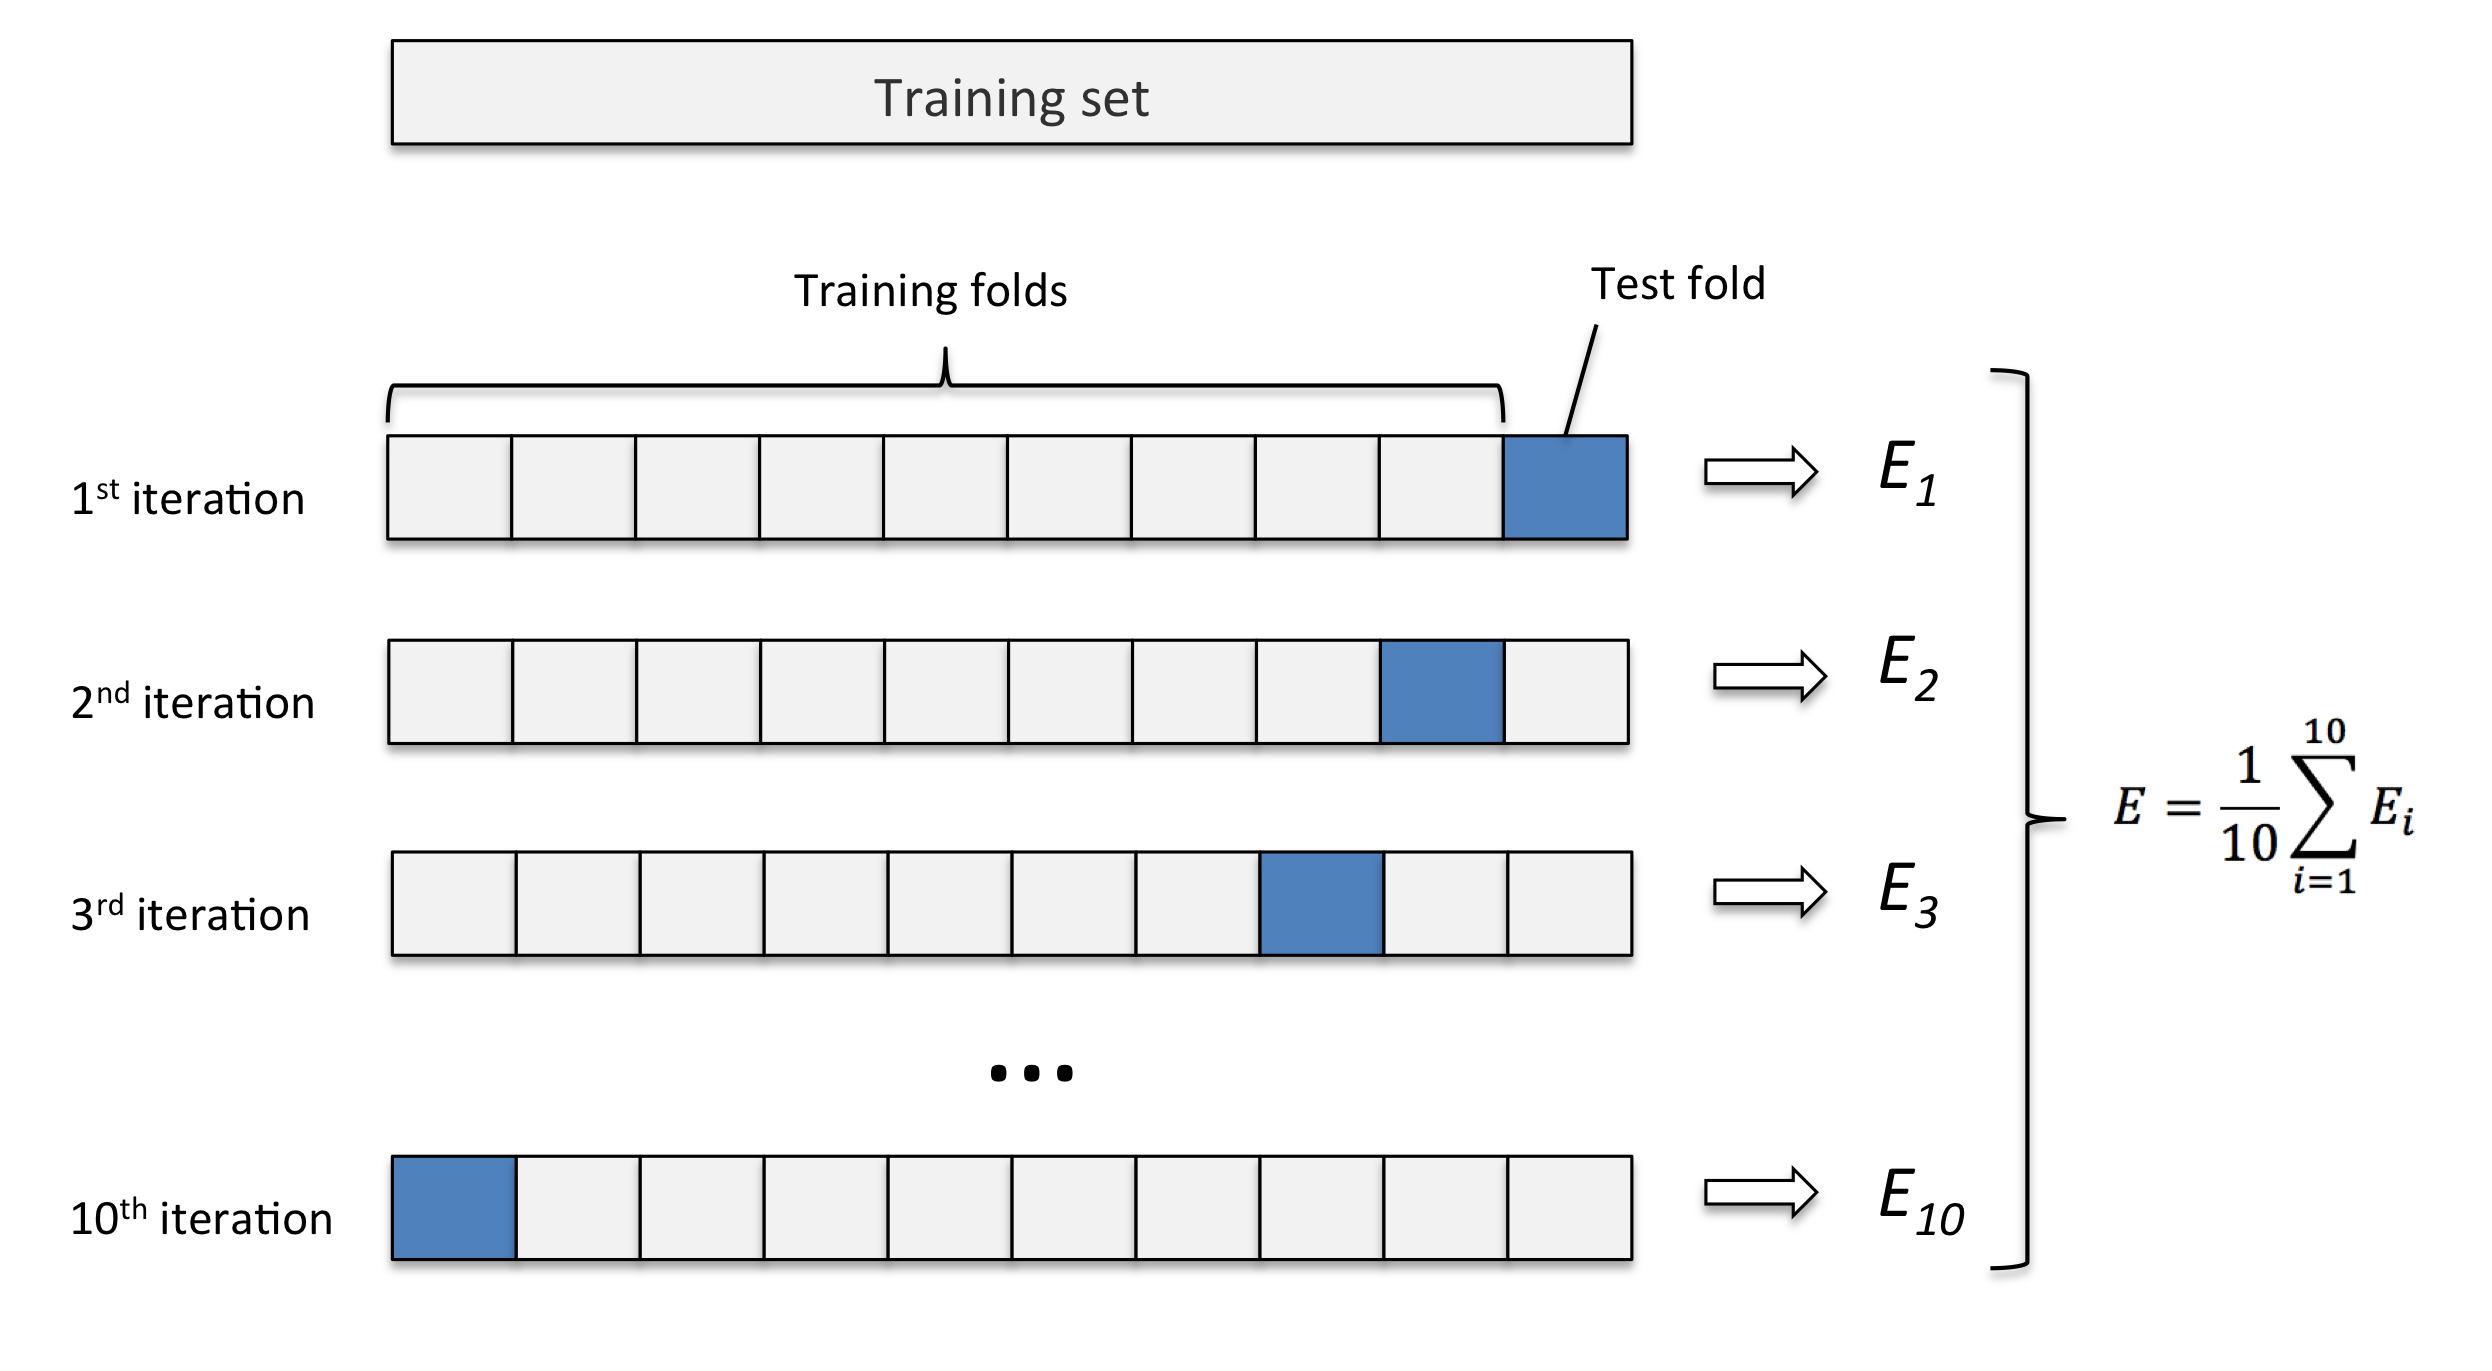

In [28]:
Image(filename='./images/06_03.png', width=500) 

In [10]:
import numpy as np

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import StratifiedKFold
else:
    from sklearn.model_selection import StratifiedKFold
    

if Version(sklearn_version) < '0.18':
    kfold = StratifiedKFold(y=y_train, 
                            n_folds=10,
                            random_state=1)
else:
    kfold = StratifiedKFold(n_splits=10,
                            random_state=1).split(X_train, y_train)

print(kfold)

sklearn.cross_validation.StratifiedKFold(labels=[1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 1 0 0], n_folds=10, shuffle=False, 

In [11]:
# kfold -> iterator
# train/test dataに分けたindexを返してくる
for i, (train, test) in enumerate(kfold):
        print('train%d' % (i+1), train)
        print('=' * 80)
        print('test%d' % (i+1), test)
        print()

train1 [ 46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290

In [12]:
kfold2 = StratifiedKFold(y=y_train, 
                            n_folds=10,
                            random_state=1)
print('All data: ratio_train 1/(0+1) %.2f\n' % (np.sum(y_train[train]==1)/train.size))
for i, (train, test) in enumerate(kfold2):
        print('%d: ratio_train 1/(0+1) %.2f' % ((i+1), np.sum(y_train[train]==1)/train.size))
        print('%d: ratio_test 1/(0+1) %.2f' % ((i+1), np.sum(y_train[test]==1)/test.size))
        print()

All data: ratio_train 1/(0+1) 0.37

1: ratio_train 1/(0+1) 0.37
1: ratio_test 1/(0+1) 0.37

2: ratio_train 1/(0+1) 0.37
2: ratio_test 1/(0+1) 0.37

3: ratio_train 1/(0+1) 0.37
3: ratio_test 1/(0+1) 0.37

4: ratio_train 1/(0+1) 0.37
4: ratio_test 1/(0+1) 0.37

5: ratio_train 1/(0+1) 0.37
5: ratio_test 1/(0+1) 0.37

6: ratio_train 1/(0+1) 0.37
6: ratio_test 1/(0+1) 0.38

7: ratio_train 1/(0+1) 0.37
7: ratio_test 1/(0+1) 0.38

8: ratio_train 1/(0+1) 0.37
8: ratio_test 1/(0+1) 0.38

9: ratio_train 1/(0+1) 0.37
9: ratio_test 1/(0+1) 0.38

10: ratio_train 1/(0+1) 0.37
10: ratio_test 1/(0+1) 0.38



In [13]:
kfold3 = StratifiedKFold(y=y_train, 
                            n_folds=10,
                            random_state=1,
                            shuffle=True)
for i, (train, test) in enumerate(kfold3):
        print('train%d' % (i+1), train)
        print('=' * 80)
        print('test%d' % (i+1), test)
        print()

train1 [  0   1   2   3   4   5   6   7   9  10  12  13  14  15  16  17  18  19
  21  22  24  25  26  27  28  29  30  31  32  34  36  37  38  39  40  41
  42  43  45  46  47  48  49  50  51  52  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 140 142 144 145 146 147 149 151 152 153 154 156 157 158 159
 160 161 162 163 164 165 167 169 170 171 173 174 175 176 177 178 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 197 198 199 200
 201 202 203 204 205 206 207 209 210 211 212 213 214 215 216 217 218 219
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 260 261 262 263 264 265 266 268 269

In [14]:
y_train2 = np.sort(y_train)
kfold4 = StratifiedKFold(y=y_train2, 
                            n_folds=10,
                            random_state=1)
print(y_train2)
for i, (train, test) in enumerate(kfold4):
        print('train%d' % (i+1), train)
        print('=' * 80)
        print('test%d' % (i+1), test)
        print()

for i, (train, test) in enumerate(kfold4):
        print('%d: ratio_train 1/(0+1) %.2f' % ((i+1), np.sum(y_train2[train]==1)/train.size))
        print('%d: ratio_test 1/(0+1) %.2f' % ((i+1), np.sum(y_train2[test]==1)/test.size))
        print()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
train1 [ 29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45 

In [15]:
data = np.concatenate([np.zeros(100) + 1,  np.zeros(9900)])
data = np.random.permutation(data)

n = 10
data_split = np.split(data, n)
for i, d in enumerate(data_split):
    print(i+1, np.sum(d==1)/d.size)  

1 0.011
2 0.008
3 0.003
4 0.012
5 0.011
6 0.011
7 0.014
8 0.012
9 0.009
10 0.009


In [16]:
kfold5 = StratifiedKFold(y=data, 
                            n_folds=n,
                            random_state=1)
for i, (train, test) in enumerate(kfold5):
        # print('%d: ratio_train 1/(0+1) %.2f' % ((i+1), np.sum(data[train]==1)/train.size))
        print('%d: ratio_test 1/(0+1) %.2f' % ((i+1), np.sum(data[test]==1)/test.size))

1: ratio_test 1/(0+1) 0.01
2: ratio_test 1/(0+1) 0.01
3: ratio_test 1/(0+1) 0.01
4: ratio_test 1/(0+1) 0.01
5: ratio_test 1/(0+1) 0.01
6: ratio_test 1/(0+1) 0.01
7: ratio_test 1/(0+1) 0.01
8: ratio_test 1/(0+1) 0.01
9: ratio_test 1/(0+1) 0.01
10: ratio_test 1/(0+1) 0.01


In [17]:
scores = []
for k, (train, test) in enumerate(kfold):
    # 学習
    pipe_lr.fit(X_train[train], y_train[train])
    # test dataのaccuracyを計算
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [256 153], Acc: 0.891
Fold: 2, Class dist.: [256 153], Acc: 0.978
Fold: 3, Class dist.: [256 153], Acc: 0.978
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.978
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.956
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy: 0.950 +/- 0.029


In [66]:
# np.bincount: 0からmax値までの非負整数の数をカウントして返す
print(str(list(range(8))))
print(list(np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))))

[0, 1, 2, 3, 4, 5, 6, 7]
[1, 3, 1, 1, 0, 0, 0, 1]


In [18]:
# 上のような面倒いことしなくても、全部やってくれる。

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import cross_val_score
else:
    from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]
CV accuracy: 0.950 +/- 0.029


<br>
<br>

# Debugging algorithms with learning curves

<br>
<br>

## Diagnosing bias and variance problems with learning curves

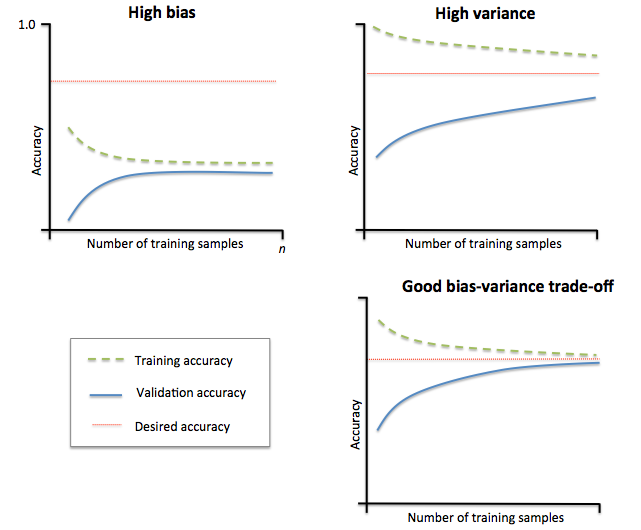

In [83]:
Image(filename='./images/06_04.png', width=600) 

In [20]:
import matplotlib.pyplot as plt

if Version(sklearn_version) < '0.18':
    from sklearn.learning_curve import learning_curve
else:
    from sklearn.model_selection import learning_curve



pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 100),
                               cv=10,
                               n_jobs=1)
print(train_sizes, train_scores.shape, test_scores.shape)
print(train_scores[0])
print(train_scores[-1])

[ 40  44  48  52  55  59  63  66  70  74  78  81  85  89  92  96 100 104
 107 111 115 118 122 126 130 133 137 141 145 148 152 156 159 163 167 171
 174 178 182 185 189 193 197 200 204 208 211 215 219 223 226 230 234 237
 241 245 249 252 256 260 263 267 271 275 278 282 286 290 293 297 301 304
 308 312 316 319 323 327 330 334 338 342 345 349 353 356 360 364 368 371
 375 379 382 386 390 394 397 401 405 409] (100, 10) (100, 10)
[ 1.     0.975  0.975  0.975  0.975  0.975  0.975  0.975  0.975  0.975]
[ 0.99022005  0.98777506  0.99022005  0.99022005  0.99266504  0.99266504
  0.99266504  0.99266504  0.99266504  0.99266504]


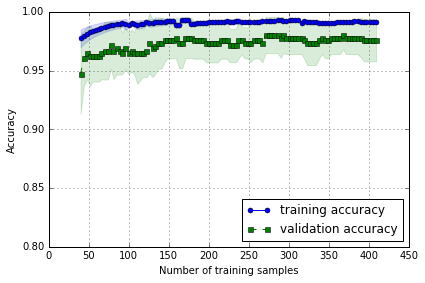

In [21]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

<br>
<br>

## Addressing over- and underfitting with validation curves

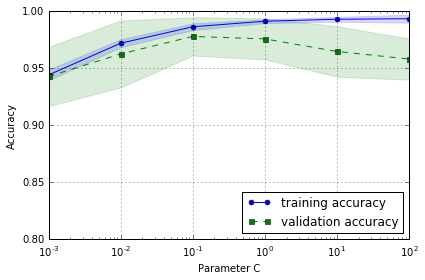

In [22]:
if Version(sklearn_version) < '0.18':
    from sklearn.learning_curve import validation_curve
else:
    from sklearn.model_selection import validation_curve



# param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_range = np.logspace(-3, 2, 6)

train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

C: 正則化のパラメータ（see S3.3）
C = 10^-3: 正則化が強すぎる -> varianceは低い（test ~ train）が、biasが高い（underfit）
C = 10^2: 正則化がゆるすぎる -> 過学習（train dataはとても良いが、test dataが低い）

<br>
<br>

# Fine-tuning machine learning models via grid search

<br>
<br>

## Tuning hyperparameters via grid search 

In [1]:
# 最適なパラメータが複数あったら？
# => Grid search: どうせコンピュータがやるんだし、全部のパラメータ調べちゃえばいいじゃん

from sklearn.svm import SVC
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import GridSearchCV
else:
    from sklearn.model_selection import GridSearchCV

pipe_svc = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': param_range, 
                  'clf__gamma': param_range, 
                  'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)

NameError: name 'Version' is not defined

In [102]:
gs.grid_scores_

[mean: 0.64176, std: 0.01710, params: {'clf__kernel': 'linear', 'clf__C': 0.0001},
 mean: 0.93846, std: 0.02354, params: {'clf__kernel': 'linear', 'clf__C': 0.001},
 mean: 0.96044, std: 0.02349, params: {'clf__kernel': 'linear', 'clf__C': 0.01},
 mean: 0.97802, std: 0.01955, params: {'clf__kernel': 'linear', 'clf__C': 0.1},
 mean: 0.97582, std: 0.02286, params: {'clf__kernel': 'linear', 'clf__C': 1.0},
 mean: 0.97143, std: 0.01409, params: {'clf__kernel': 'linear', 'clf__C': 10.0},
 mean: 0.95165, std: 0.02117, params: {'clf__kernel': 'linear', 'clf__C': 100.0},
 mean: 0.94505, std: 0.02961, params: {'clf__kernel': 'linear', 'clf__C': 1000.0},
 mean: 0.62637, std: 0.00411, params: {'clf__gamma': 0.0001, 'clf__kernel': 'rbf', 'clf__C': 0.0001},
 mean: 0.62637, std: 0.00411, params: {'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'clf__C': 0.0001},
 mean: 0.62637, std: 0.00411, params: {'clf__gamma': 0.01, 'clf__kernel': 'rbf', 'clf__C': 0.0001},
 mean: 0.62637, std: 0.00411, params: {'clf__

In [95]:
print(gs.best_score_)
print(gs.best_params_)

0.978021978022
{'clf__kernel': 'linear', 'clf__C': 0.1}


In [114]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.965


<br>
<br>

## Algorithm selection with nested cross-validation

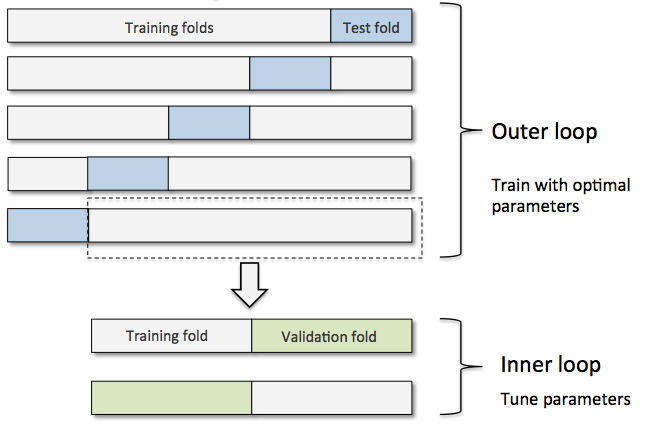

In [103]:
Image(filename='./images/06_07.png', width=500) 

In [110]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

# cross_val_scoreは、estimatorとx, yを渡したらk-fold cross validationしてくれるイカした奴（上述）
# 上ではestimatorは1つだったが、今回は複数（params_grid分）
# どうやら勝手にbestなparameterをデータセットごとにchoiceして、tuned-parmeter estimatorを返しているようだ
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print(scores)

[ 0.95604396  0.92307692  1.          0.96703297  0.97802198]


In [111]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.965 +/- 0.025


In [106]:
# hyper parameterでなく、algorithmの比較に使う。
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# -> SVMの方がよい

[ 0.89010989  0.89010989  0.92307692  0.96703297  0.93406593]
CV accuracy: 0.921 +/- 0.029


<br>
<br>

# Looking at different performance evaluation metrics

...

## Reading a confusion matrix

In [3]:
from IPython.display import Image
%matplotlib inline
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

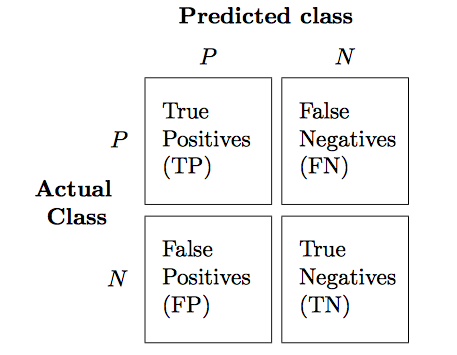

In [4]:
Image(filename='./images/06_08.png', width=300) 

True / False -> 予測があたったか？　（真偽）
Posi / Nega -> 予測が1 / 0 (1=陽性； 0=陰性)

In [5]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wdbc/wdbc.data', header=None)

X = df.loc[:, 2:].values
y0 = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y0)

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])
pipe_svc = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=1))])

In [7]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


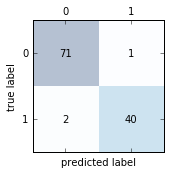

In [8]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

### Additional Note

Remember that we previously encoded the class labels so that *malignant* samples are the "postive" class (1), and *benign* samples are the "negative" class (0):

In [19]:
le.transform(['M', 'B'])

array([1, 0])

Next, we printed the confusion matrix like so:

In [21]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


Note that the (true) class 0 samples that are correctly predicted as class 0 (true negatives) are now in the upper left corner of the matrix (index 0, 0). In order to change the ordering so that the true negatives are in the lower right corner (index 1,1) and the true positves are in the upper left, we can use the `labels` argument like shown below:

In [23]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

[[40  2]
 [ 1 71]]


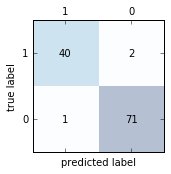

In [34]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
ax.set_xticklabels([''] + [1, 0])
ax.set_yticklabels([''] + [1, 0])
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

We conclude:

Assuming that class 1 (malignant) is the positive class in this example, our model correctly classified 71 of the samples that belong to class 0 (true negatives) and 40 samples that belong to class 1 (true positives), respectively. However, our model also incorrectly misclassified 1 sample from class 0 as class 1 (false positive), and it predicted that 2 samples are benign although it is a malignant tumor (false negatives).

<br>
<br>

## Optimizing the precision and recall of a classification model

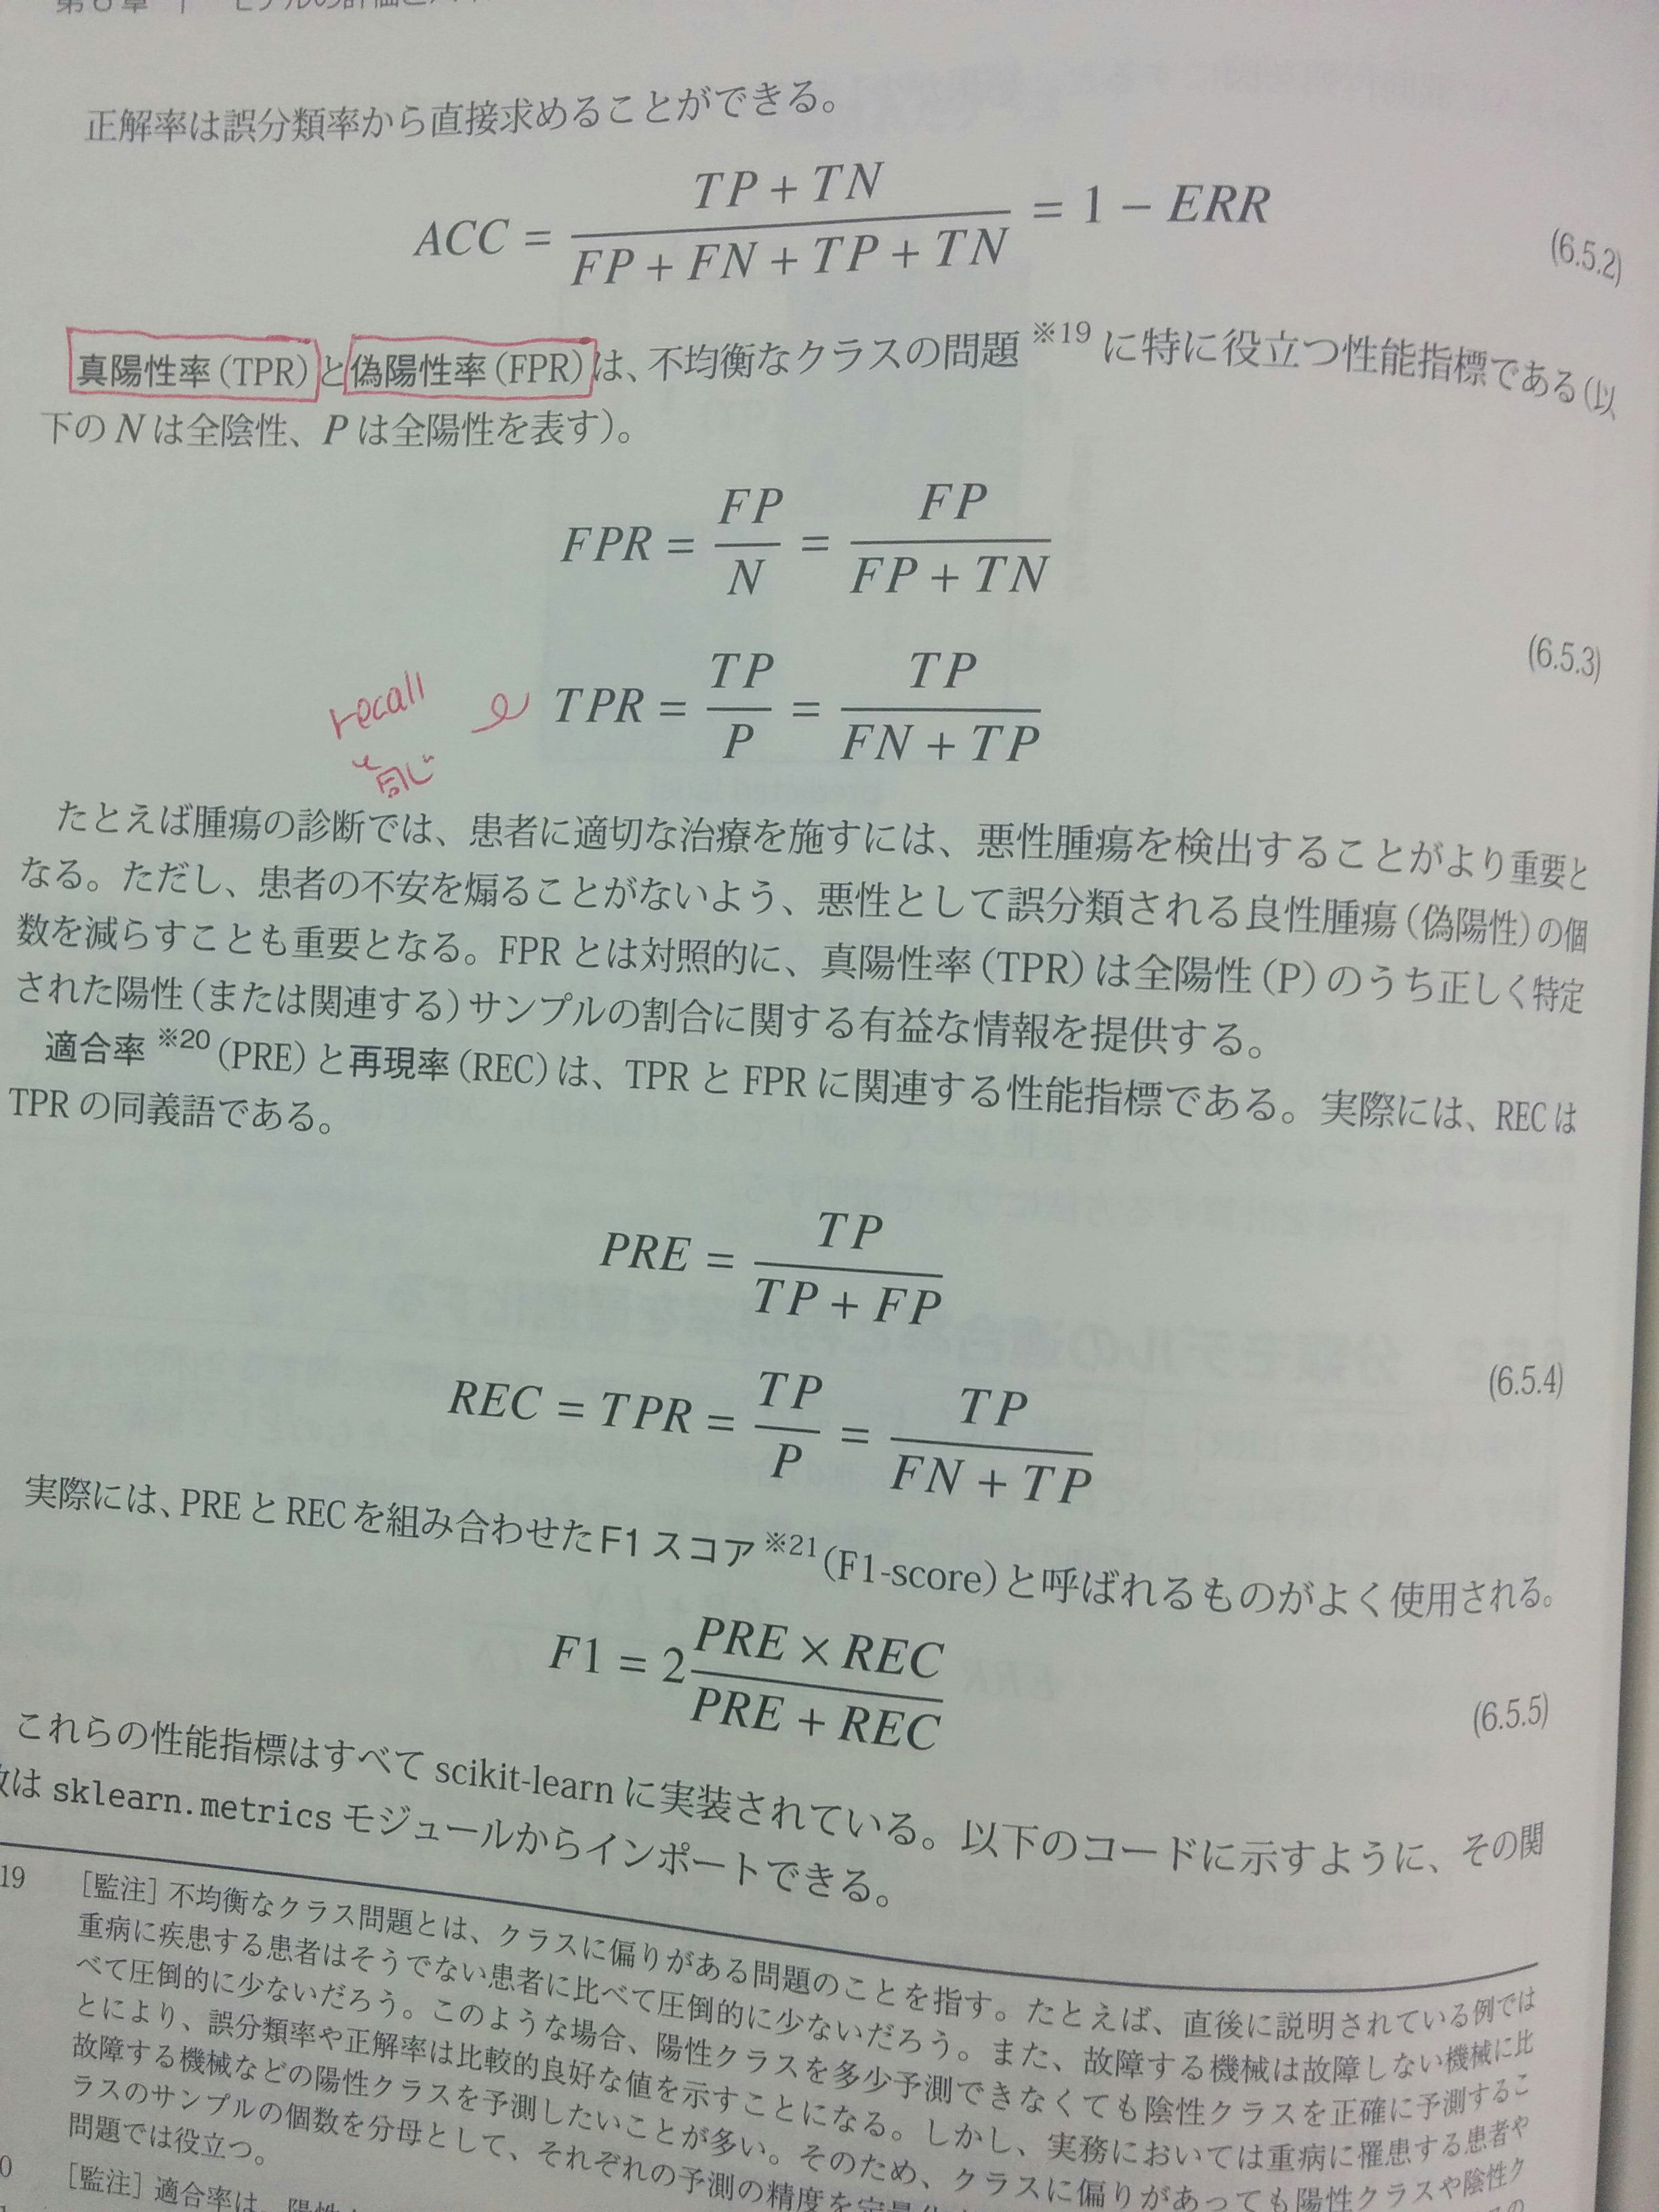

In [37]:
Image('./page184.png', width=1000)

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


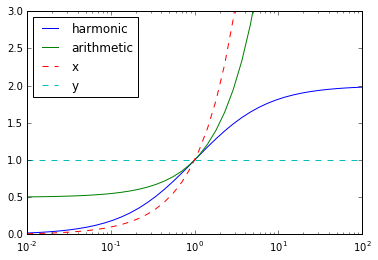

In [32]:
def harmonic_mean(x, y):
    return 2 / (1. / x + 1. / y)

x = np.logspace(-2, 2, 40)
y = np.ones_like(x)
plt.plot(x, harmonic_mean(x, y), label='harmonic')
plt.plot(x, 0.5 * (x + y), label='arithmetic')
# plt.plot(x, np.minimum(x, y), 'b--', label='min')
# plt.plot(x, np.maximum(x, y), 'g--', label='max')
plt.plot(x, x, '--', label='x')
plt.plot(x, y, '--', label='y')

plt.xscale('log')
plt.ylim([0, 3])
plt.legend(loc='upper left')

In [ ]:
# F1: PRE, RECどちらも大きくしたいときに使う指標

In [42]:
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import GridSearchCV
else:
    from sklearn.model_selection import GridSearchCV
    
from sklearn.metrics import f1_score, accuracy_score


scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'clf__C': c_gamma_range,
               'clf__kernel': ['linear']},
              {'clf__C': c_gamma_range,
               'clf__gamma': c_gamma_range,
               'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.982798668208
{'clf__kernel': 'linear', 'clf__C': 0.1}


In [45]:
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import GridSearchCV
else:
    from sklearn.model_selection import GridSearchCV
    
from sklearn.metrics import f1_score, accuracy_score


scorer = make_scorer(accuracy_score)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'clf__C': c_gamma_range,
               'clf__kernel': ['linear']},
              {'clf__C': c_gamma_range,
               'clf__gamma': c_gamma_range,
               'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
#                   scoring='accuracy',
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.978021978022
{'clf__kernel': 'linear', 'clf__C': 0.1}


In [ ]:
Classification	 	 
‘accuracy’	metrics.accuracy_score	 
‘average_precision’	metrics.average_precision_score	 
‘f1’	metrics.f1_score	for binary targets
‘f1_micro’	metrics.f1_score	micro-averaged
‘f1_macro’	metrics.f1_score	macro-averaged
‘f1_weighted’	metrics.f1_score	weighted average
‘f1_samples’	metrics.f1_score	by multilabel sample
‘neg_log_loss’	metrics.log_loss	requires predict_proba support
‘precision’ etc.	metrics.precision_score	suffixes apply as with ‘f1’
‘recall’ etc.	metrics.recall_score	suffixes apply as with ‘f1’
‘roc_auc’	metrics.roc_auc_score	 

Clustering	 	 
‘adjusted_rand_score’	metrics.adjusted_rand_score	 

Regression	 	 
‘neg_mean_absolute_error’	metrics.mean_absolute_error	 
‘neg_mean_squared_error’	metrics.mean_squared_error	 
‘neg_median_absolute_error’	metrics.median_absolute_error	 
‘r2’	metrics.r2_score

<br>
<br>

## Plotting a receiver operating characteristic

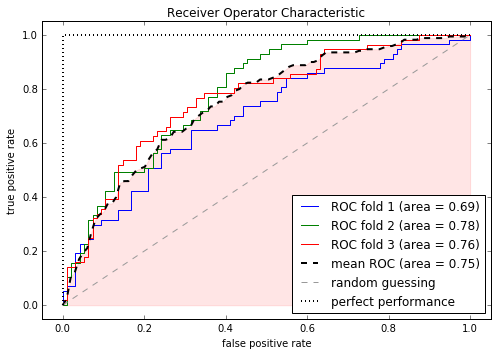

In [61]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import StratifiedKFold
else:
    from sklearn.model_selection import StratifiedKFold
    
from sklearn.metrics import roc_curve, auc
from scipy import interp


pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                               random_state=0, 
                                               C=100.0))])

# 特徴量を2つだけ選択
X_train2 = X_train[:, [4, 14]]


if Version(sklearn_version) < '0.18':
    cv = StratifiedKFold(y_train, 
                         n_folds=3, 
                         random_state=1)
    
else:
    cv = list(StratifiedKFold(n_splits=3, 
                              random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.fill_between(mean_fpr, mean_tpr, np.zeros_like(mean_fpr),
                             alpha=0.1, color='red')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

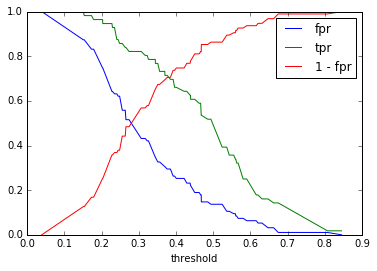

In [59]:
# ROC:
# false positive rateが低く、かつ、true positive rateが高い、のが理想的な分類器
# thresholdによって、fpr, tprなどmetricsは変わってしまう
# => 一緒にして見よう、という考え。
# thresholdが完全に隠れてしまいっているので、最初は混乱するかも。

# AUC:
# area under curve
# 定量的な指標が欲しいので、面積をとってる。
# 上のようなfaggyな哲学なので、　AUCは分類器の「良さ」をだいたい知るための指標
# として使えば十分だろう。
# ~0.5 -> 低すぎ -> 分類器として使えない
# ~0.8 -> いい感じ
# >0.9　-> 高すぎ -> バグ？

plt.plot(thresholds, fpr, label='fpr')
plt.plot(thresholds, tpr, label='tpr')
plt.plot(thresholds, 1 - fpr, label='1 - fpr')
plt.xlabel('threshold')
plt.legend()

In [62]:
pipe_lr = pipe_lr.fit(X_train2, y_train)
y_pred2 = pipe_lr.predict(X_test[:, [4, 14]])

In [63]:
from sklearn.metrics import roc_auc_score, accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred2))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.662
Accuracy: 0.711


<br>
<br>

## The scoring metrics for multiclass classification

In [64]:
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')

<br>
<br>

# Summary

...